# **Google Runoff Reanalysis & Reforecast dataset (GRRR) extraction**

This notebook is complementary to the colab (https://colab.research.google.com/drive/1FnXXSEQqU1TJhMPiNeWUTr9LnbJwZzMm?usp=sharing) which facilitates reading the GRRR.

GRRR consists of hydrologic predictions by Google state-of-the-art (SOTA) hydrologic model, an improved version of the model described in the Nature article (https://www.nature.com/articles/s41586-024-07145-1), with full global coverage and daily resolution. It includes:
* Streamflow reanalysis data for ±1M hybas's (hydrological basin) for 1980 - 2023, on which, too, return period values are based and calculated (the ‘severity threshold levels’ we already knew);
* Streamflow reforecast data for ±1M hybas's for 2016 - 2022, with 7-day lead times.


##### **Step-by-step plan for the analysis:**

- Make a list of all new hybas locations (of interest?). After the update, a **lot** of new stations have been added to FloodHub, 10^2 - 10^3 ish range. To download this manually would be extremely tedious, so maybe Google can help with this. It would be good to automate this for later as well, of course. Maybe there's a way to get all hybas stations in the colab.
- Think of a method (which finishes the downloads and then goes to the next one, or do the analysis in colab) which efficiently handles all data. Then, download all data for the hybases with the colab
- With the data ready, make functions and do the "easy" part: the rest of the analysis

*NB:* Having the "Better Comments" extension installed is adviced for reading some of the comments

##### **Extract Mali data**

In [1]:
import analyse


Running __init__.py for GoogleFloodHub-data-analyser

Running __init__.py for GoogleFloodHub-data-extractor
GoogleFloodHub-data-extractor initialized

GoogleFloodHub-data-analyser initialized



In [2]:
df_Mali_gauges, df_Mali_gauge_models, df_Mali_forecasts = \
    analyse.get_country_data('Mali','2024-07-08', '2024-10-08')

In [3]:
print(df_Mali_gauges['gaugeId'])

0     hybas_1120641660
1     hybas_1120650110
2     hybas_1120661040
3     hybas_1120679780
4     hybas_1120689830
5     hybas_1120705070
6     hybas_1120737100
7     hybas_1120739110
8     hybas_1120758950
9     hybas_1120766460
10    hybas_1121890140
11    hybas_1121893090
12    hybas_1121895840
13    hybas_1121900350
14    hybas_1121905290
15    hybas_1121919510
Name: gaugeId, dtype: object


Replace the comment-block (1) with comment-block (2) in colab (of the aforementioned URL) for the Mali data to download

In [4]:
""" comment-block (1)
gauge_reforecast_ds = reforecast_ds.sel(gauge_id=hybas_id).compute()
gauge_reanalysis_ds = reanalysis_ds.sel(gauge_id=hybas_id).compute()
gauge_return_periods_ds = return_periods_ds.sel(gauge_id=hybas_id).compute()
"""

""" comment-block (2)
Mali_hybases = [
  'hybas_1120641660',
  'hybas_1120650110',
  'hybas_1120661040',
  'hybas_1120679780',
  'hybas_1120689830',
  'hybas_1120705070',
  'hybas_1120737100',
  'hybas_1120739110',
  'hybas_1120758950',
  'hybas_1120766460',
  'hybas_1121890140',
  'hybas_1121893090',
  'hybas_1121895840',
  'hybas_1121900350',
  'hybas_1121905290',
  'hybas_1121919510'
]

for hybas_id in Mali_hybases:
  gauge_reforecast_ds = reforecast_ds.sel(gauge_id = hybas_id).compute()
  gauge_reanalysis_ds = reanalysis_ds.sel(gauge_id = hybas_id).compute()
  gauge_return_periods_ds = return_periods_ds.sel(gauge_id = hybas_id).compute()

  gauge_reforecast_ds.to_netcdf(f'{hybas_id}_reforecast_ds.nc')
  gauge_reanalysis_ds.to_netcdf(f'{hybas_id}_reanalysis_ds.nc')
  gauge_return_periods_ds.to_netcdf(f'{hybas_id}_return_periods_ds.nc')

  files.download(f'{hybas_id}_reforecast_ds.nc')
  files.download(f'{hybas_id}_reanalysis_ds.nc')
  files.download(f'{hybas_id}_return_periods_ds.nc')
"""

" comment-block (2)\nMali_hybases = [\n  'hybas_1120641660',\n  'hybas_1120650110',\n  'hybas_1120661040',\n  'hybas_1120679780',\n  'hybas_1120689830',\n  'hybas_1120705070',\n  'hybas_1120737100',\n  'hybas_1120739110',\n  'hybas_1120758950',\n  'hybas_1120766460',\n  'hybas_1121890140',\n  'hybas_1121893090',\n  'hybas_1121895840',\n  'hybas_1121900350',\n  'hybas_1121905290',\n  'hybas_1121919510'\n]\n\nfor hybas_id in Mali_hybases:\n  gauge_reforecast_ds = reforecast_ds.sel(gauge_id = hybas_id).compute()\n  gauge_reanalysis_ds = reanalysis_ds.sel(gauge_id = hybas_id).compute()\n  gauge_return_periods_ds = return_periods_ds.sel(gauge_id = hybas_id).compute()\n\n  gauge_reforecast_ds.to_netcdf(f'{hybas_id}_reforecast_ds.nc')\n  gauge_reanalysis_ds.to_netcdf(f'{hybas_id}_reanalysis_ds.nc')\n  gauge_return_periods_ds.to_netcdf(f'{hybas_id}_return_periods_ds.nc')\n\n  files.download(f'{hybas_id}_reforecast_ds.nc')\n  files.download(f'{hybas_id}_reanalysis_ds.nc')\n  files.download(f'{h

This method is not robust, and due to many reoccuring downloads possible overloading colabs RAM or whatever, some files fail to download. This can probably worked around by using time.sleep() or some outer loop with a lag, but the safest option is to download one-by-one by uncommenting hybas ID's:

In [5]:
""" 
# hybas_id = 'hybas_1120641660'
# hybas_id = 'hybas_1120650110'
# hybas_id = 'hybas_1120661040'
# hybas_id = 'hybas_1120679780'
# hybas_id = 'hybas_1120689830'
# hybas_id = 'hybas_1120705070'
# hybas_id = 'hybas_1120737100'
# hybas_id = 'hybas_1120739110'
# hybas_id = 'hybas_1120758950'
# hybas_id = 'hybas_1120766460'
# hybas_id = 'hybas_1121890140'
# hybas_id = 'hybas_1121893090'
# hybas_id = 'hybas_1121895840'
# hybas_id = 'hybas_1121900350'
# hybas_id = 'hybas_1121905290'
# hybas_id = 'hybas_1121919510'
"""

" \n# hybas_id = 'hybas_1120641660'\n# hybas_id = 'hybas_1120650110'\n# hybas_id = 'hybas_1120661040'\n# hybas_id = 'hybas_1120679780'\n# hybas_id = 'hybas_1120689830'\n# hybas_id = 'hybas_1120705070'\n# hybas_id = 'hybas_1120737100'\n# hybas_id = 'hybas_1120739110'\n# hybas_id = 'hybas_1120758950'\n# hybas_id = 'hybas_1120766460'\n# hybas_id = 'hybas_1121890140'\n# hybas_id = 'hybas_1121893090'\n# hybas_id = 'hybas_1121895840'\n# hybas_id = 'hybas_1121900350'\n# hybas_id = 'hybas_1121905290'\n# hybas_id = 'hybas_1121919510'\n"

Now, download the manually added data (after putting it in folders (manually or with os/shutil package))

In [6]:
import xarray as xr

In [7]:
# First, try one hybas_id to test:
hybas_id = 'hybas_1120641660'

ds_reanalysis_1120641660 = xr.open_dataset(f'../data/GRRR/reanalysis/{hybas_id}_reanalysis_ds.nc')
ds_reforecast_1120641660 = xr.open_dataset(f'../data/GRRR/reforecast/{hybas_id}_reforecast_ds.nc')
ds_return_ps_1120641660 = xr.open_dataset(f'../data/GRRR/return_periods/{hybas_id}_return_periods_ds.nc')

In [8]:
print(type(ds_reanalysis_1120641660))

<class 'xarray.core.dataset.Dataset'>


In [9]:
print(ds_return_ps_1120641660)

<xarray.Dataset>
Dimensions:            ()
Coordinates:
    gauge_id           object ...
Data variables:
    return_period_10   float64 ...
    return_period_100  float64 ...
    return_period_15   float64 ...
    return_period_2    float64 ...
    return_period_20   float64 ...
    return_period_200  float64 ...
    return_period_25   float64 ...
    return_period_5    float64 ...
    return_period_50   float64 ...
    return_period_7    float64 ...


In [10]:
# Now, download for all hybases:
dict_ds_data_Mali = {}
dict_return_periods = {}
for hybas in df_Mali_gauges['gaugeId']:
    ds_reanalysis = xr.open_dataset(f'../data/GRRR/reanalysis/{hybas}_reanalysis_ds.nc')
    ds_reforecast = xr.open_dataset(f'../data/GRRR/reforecast/{hybas}_reforecast_ds.nc')
    ds_return_ps = xr.open_dataset(f'../data/GRRR/return_periods/{hybas}_return_periods_ds.nc')

    dict_ds_data_Mali[hybas] = {'reanalysis': ds_reanalysis,
                                'reforecast': ds_reforecast,
                                'return_periods': ds_return_ps}
    dict_return_periods[hybas] = ds_return_ps

Some plotting functions/utils (partly copied from the same notebook):

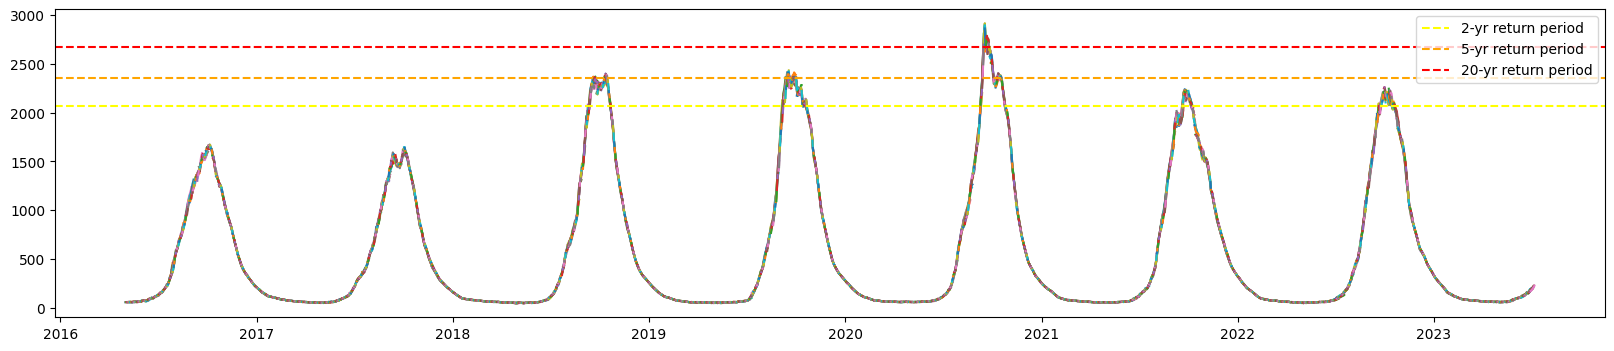

In [11]:
issue_time_start_date = '2016-05-01'
issue_time_end_date = '2024-10-30'

analyse.plot_reforecast(issue_time_start_date, issue_time_end_date,
                        ds_reforecast_1120641660, ds_return_ps_1120641660)

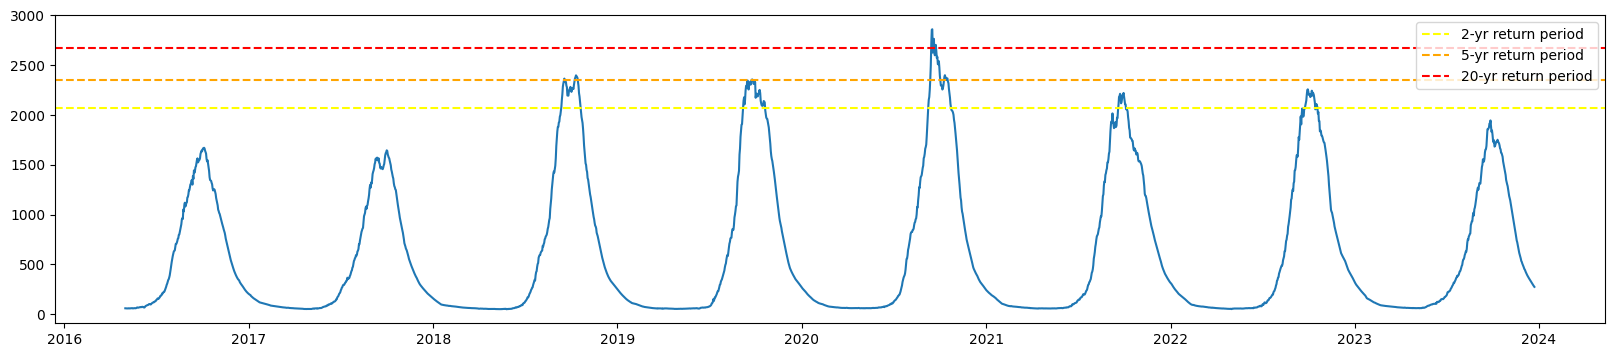

In [12]:
issue_time_start_date = '2016-05-01'
issue_time_end_date = '2024-10-30'

analyse.plot_reanalysis(issue_time_start_date, issue_time_end_date,
                        ds_reanalysis_1120641660, ds_return_ps_1120641660)

In [13]:
# # Plot all reanalysis data for Mali, 2016 - 2024:
# issue_time_start_date = '2016-05-01'
# issue_time_end_date = '2024-10-30'

# for hybas_id in dict_ds_data_Mali.keys():
#     ds_reanalysis = dict_ds_data_Mali[hybas_id]['reanalysis']
#     ds_return_ps = dict_ds_data_Mali[hybas_id]['return_periods']

#     analyse.plot_reanalysis(issue_time_start_date, issue_time_end_date,
#                             ds_reanalysis, ds_return_ps)

In [14]:
# # Plot all reforecast data for Mali, 2016 - 2024:
# issue_time_start_date = '2016-05-01'
# issue_time_end_date = '2024-10-30'

# for hybas_id in dict_ds_data_Mali.keys():
#     ds_reforecast = dict_ds_data_Mali[hybas_id]['reforecast']
#     ds_return_ps = dict_ds_data_Mali[hybas_id]['return_periods']

#     analyse.plot_reforecast(issue_time_start_date, issue_time_end_date,
#                             ds_reforecast, ds_return_ps)

##### **Create flood events**

We take all available (re)forecast data for a gauge, and loop through it to create "flood events"; periods of consecutive flooding in an administrative unit. A flood event is "triggered" once the maximum 7-day lead time predicted discharge in an administrative unit surpasses the 5-yr return period threshold. To come to a list of flood events, we'll:
- define a function that takes classifies data into an administrative unit
- define a function that takes all gauges in an administrative unit and returns the aggregated maximum (or another statistic) of the unit
- define a function that, given a timeseries of (maximum) forecast values, creates flood events

In [15]:
type(ds_reforecast_1120641660)
ds_reforecast_1120641660

<xarray.Dataset>
Dimensions:     (issue_time: 2738, lead_time: 8)
Coordinates:
  * issue_time  (issue_time) datetime64[ns] 2016-01-01 2016-01-02 ... 2023-06-30
    gauge_id    object ...
  * lead_time   (lead_time) timedelta64[ns] 0 days 1 days ... 6 days 7 days
Data variables:
    streamflow  (issue_time, lead_time) float32 ...

In [16]:
# initialise all reforecast and return periods datasets available for Mali
# by making a dictionary with the hybas ID as the key

In [17]:
# To automate the classification of the gauges into administrative units,
# we first need to add coordinates to of every gauge dataset
from typing import Dict
import pandas as pd
import xarray as xr


def get_country_gauge_coords(country: str) -> pd.DataFrame:
    """
    Get the coordinates of the gauges in a country, stored in data/ folder

    :param country: name of the country
    :return: DataFrame with the gaugeId, latitude and longitude
    """
    if country[0].islower():
        country = country.capitalize()
    return pd.read_csv(f'../data/processed/gauge_coords/{country}_gauge_coords.csv',
                       index_col = None, sep = ';', decimal = '.')


def assign_coords_to_datasets(
        datasets: Dict[str, xr.Dataset], country: str
    ) -> xr.Dataset:
    """
    Takes a dict of datasets and assigns their coordinates, which it gets
    from get_country_gauge_coords(), and assigns it to each dataset. The
    dict contains the names of the datasets as keys and the datasets as values

    :param datasets: dict of datasets
    :param country: name of the country
    :return: dict of datasets with coordinates
    """
    df_coords = get_country_gauge_coords(country)

    for gauge_id, dataset in datasets.items():
        # assumes full name, e.g. 'hybas_1120661040', in df_coords, thus creating
        # a comparison of solely the hybas numbers, not the full name or dataset identifier
        coords = df_coords[
            df_coords['gaugeId'].apply(lambda x: x.split('_')[-1]) == gauge_id.split('_')[-1]
        ]

        if not coords.empty:
            # add the coordinates to the dataset as attributes
            dataset.attrs['latitude'] = coords['latitude'].values[0]
            dataset.attrs['longitude'] = coords['longitude'].values[0]
            # add the hybas_id to the dataset as well (e.g. '1120661040')
            dataset.attrs['gauge_id'] = gauge_id.split('_')[-1]
        else:
            print(f'No coordinates found for gauge {gauge_id}') 

    return datasets

In [18]:
# create the dictionary with dataset names as keys and the datasets as values
dict_datasets = {name: value for name, value in globals().items() if name.startswith('ds_reforecast_')}
print(dict_datasets)

{'ds_reforecast_1120641660': <xarray.Dataset>
Dimensions:     (issue_time: 2738, lead_time: 8)
Coordinates:
  * issue_time  (issue_time) datetime64[ns] 2016-01-01 2016-01-02 ... 2023-06-30
    gauge_id    object ...
  * lead_time   (lead_time) timedelta64[ns] 0 days 1 days ... 6 days 7 days
Data variables:
    streamflow  (issue_time, lead_time) float32 ...}


In [19]:
# get all reforecast datasets for Mali from dict_ds_data_Mali and change
# they key from hybas_... to ds_reforecast_...
dict_datasets = {key: value['reforecast'] for key, value in dict_ds_data_Mali.items()}
dict_datasets = {key.replace('hybas_', 'ds_reforecast_'): value for key, value in dict_datasets.items()}
print(dict_datasets.keys())

dict_keys(['ds_reforecast_1120641660', 'ds_reforecast_1120650110', 'ds_reforecast_1120661040', 'ds_reforecast_1120679780', 'ds_reforecast_1120689830', 'ds_reforecast_1120705070', 'ds_reforecast_1120737100', 'ds_reforecast_1120739110', 'ds_reforecast_1120758950', 'ds_reforecast_1120766460', 'ds_reforecast_1121890140', 'ds_reforecast_1121893090', 'ds_reforecast_1121895840', 'ds_reforecast_1121900350', 'ds_reforecast_1121905290', 'ds_reforecast_1121919510'])


In [20]:
# With the coordinates added, we can classify the gauges into administrative units
import analyse
from typing import Dict
import warnings
import pandas as pd
import geopandas as gpd
import xarray as xr


def create_coords_df_from_ds(dict_ds: Dict[str, xr.Dataset]) -> pd.DataFrame:
    """
    Create a DataFrame with all gauge ID's and coordinates in a
    dictionary with xarray Datasets

    :param dict_ds: xarray Dataset
    :return: DataFrame with the coordinates
    """
    return pd.DataFrame([
        {
            'gauge_id': ds.attrs['gauge_id'],
            'longitude': ds.attrs['longitude'],
            'latitude': ds.attrs['latitude']
        }
        for ds in dict_ds.values()
    ])


def assure_admin_units_assigned(dict_ds: Dict[str, xr.Dataset]) -> None:
    """
    Check if all datasets have been assigned an admin unit

    :param dict_ds: dict of datasets
    """
    for ds in dict_ds.values():
        if 'admin_unit' not in ds.attrs:
            print(f'No admin unit assigned to dataset {ds.attrs["gauge_id"]}')
            continue
        admin_unit = ds.attrs['admin_unit']
        if any(pd.isna(unit) for unit in admin_unit):
            print(f'No admin unit assigned to dataset {ds.attrs["gauge_id"]} (NaN found)')


def handle_NaN_admin_units(codes: pd.Series) -> list:
    """
    Handle NaN values in the series of administrative unit assignments for gauges

    :param codes: Series containing administrative unit codes (ADM2_PCODE) for a gauge
    :return: list of valid administrative unit codes (ADM2_PCODE)
    """
    if codes.isna().any():
        print(f"Warning: Found NaN in administrative unit assignment "
              f"for gauge IDs: {codes[codes.isna()].index.tolist()}")
    return list(codes.dropna())


def assign_admin_unit_to_datasets(
        dict_ds: Dict[str, xr.Dataset],
        country: str = 'Mali',
        verbose: bool = True,
        # Path to the shape file with admin level 2 units for Mali
        path: str = 'mali_ALL/mli_adm_ab_shp/mli_admbnda_adm2_1m_gov_20211220.shp',
        buffer_radius: int = 5000
    ) -> Dict[str, xr.Dataset]:
    """
    Assigns the administrative unit to each dataset in the dictionary by:
    (1) assiging coordinates to the datasets, with assign_coords_to_datasets(),
        which takes information queried by ListGauges() in the 'extract' package
    (2) creating a GeoDataFrame from the dataset coordinates, which includes a
        5 km buffer around the gauges, to account for shape file inaccuracies and,
        more importantly, the fact that gauges are usually located in rivers, which,
        in turn, are usually borders between administrative units, causing gauges to
        be located in only onr of the units, while they effectively tell about both.
        With a buffer, this is accounted for, and, as a result, gauges can be assigned
        to multiple administrative units, if they simply intersect with multiple units
    (3) creating a GeoDataFrame from the shape file with the admin units, source:
        (https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/)
    (4) classifying the gauges into the administrative units by joining the two above
    (5) adding the admin unit names to the datasets by matching the gauge ID's and
        the found administrative units
    (6) returning the updated dictionary with the datasets, with datasets that now have
        the attributes 'longitude', 'latitude', and 'admin_unit'

    :param dict_ds: dict of datasets
    :param country: name of the country
    :param verbose: whether to print some test print-s's
    :param path: path to the shape file with the admin units
    :param buffer_radius: radius of the buffer around the gauges, standard is 5 km
    :return: dict of datasets with administrative units
    """
    #* (1): assign coordinates to the datasets
    dict_ds = assign_coords_to_datasets(dict_ds, country)
    # print(next(iter(dict_ds.items()))) if verbose else None

    #* (2): create a GeoDataFrame from the dataset coordinates;
    # geometry is a point for each gauge, with coords (x, y)
    df_gauge_coords = create_coords_df_from_ds(dict_ds)
    gpd_Mali_gauge_coords = gpd.GeoDataFrame(
        df_gauge_coords,
        geometry = gpd.points_from_xy(
            df_gauge_coords['longitude'], df_gauge_coords['latitude']
        ),
        crs = 'EPSG:4326'
    )
    # add a buffer of 5 km around the points to account for inaccuracies,
    # where 1 degree is approx. 111,32 km at the equator, so in degrees (which
    # we have to use as the coordinate system is WGS84), 5 km is 5000 meter \
    # divided by 111.320 meters (5000 / 111320). This is a rough estimate, but
    # should be sufficient, since the number of 5 km is too mostly arbirtrary.
    # Also, surpress the warning that the buffer is not exact, as we are aware
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        gpd_Mali_gauge_coords['geometry'] = \
            gpd_Mali_gauge_coords.geometry.buffer(buffer_radius / 111320)

    #* (3): read the shape file into a GeoDataFrame and convert it to WGS84
    # (which is the coordinate system used by the gauge data)
    gpd_adm_units_Mali = analyse.get_shape_file(path).to_crs('EPSG:4326')
    # check if the coord systems are the same
    if gpd_adm_units_Mali.crs != gpd_Mali_gauge_coords.crs:
        gpd_adm_units_Mali = gpd_adm_units_Mali.to_crs(gpd_Mali_gauge_coords.crs)
    analyse.assert_same_coord_system(gpd_adm_units_Mali, gpd_Mali_gauge_coords)

    #* (4) now we can classify the gauges into the administrative units:
    # creating a joined dataframe with the gauges as basis, meaning
    # that gauges get assigned to the admin unit they are within,
    # including their metadata (such as the shape of the admin unit).
    # (And, thus, the rest of the admin units are not considered.)
    gpd_gauges_classified = gpd.sjoin(
        gpd_Mali_gauge_coords, gpd_adm_units_Mali,
        how = 'left',           # joins left, i.e. the gauges serve as basis
                                # checks if the gauge intersects with the admin unit
        predicate = 'intersects',
        lsuffix = 'gauge', rsuffix = 'adm'
    )
    print(gpd_gauges_classified.head(1)) if verbose else None
    # make a mapping of the gauge ID's and the admin unit names:
    # group by gauge ID; select the admin unit names; check for NaNs;
    # convert to list; then dictionary with {gauge_id: [admin_unit]}
    mapping = gpd_gauges_classified.groupby('gauge_id')['ADM2_PCODE']\
        .apply(handle_NaN_admin_units).to_dict()

    #* (5) lastly, we add the admin unit names to the datasets
    print(mapping) if verbose else None
    for gauge_id, admin_units in mapping.items():
        dict_ds[f'ds_reforecast_{gauge_id}'].attrs['admin_unit'] = admin_units

    #* (6) check result and return
    assure_admin_units_assigned(dict_ds)
    print('\n\n', next(iter(dict_ds.items()))) if verbose else None
    return dict_ds

In [21]:
dict_datasets = assign_admin_unit_to_datasets(dict_datasets)

     gauge_id  longitude  latitude  \
0  1120641660   -4.20625  14.50625   

                                            geometry  index_adm  Shape_Leng  \
0  POLYGON ((-4.16133 14.50625, -4.16155 14.50185...         33    5.438311   

   Shape_Area ADM2_FR ADM2_PCODE ADM2_REF ADM2ALT1FR ADM2ALT2FR ADM1_FR  \
0    0.611429   Mopti     ML0506     None       None       None   Mopti   

  ADM1_PCODE    ADM0_FR ADM0_PCODE       date    validOn     validTo  
0       ML05  Mali (le)         ML 2015-06-01 2021-12-20  0000/00/00  
{'1120641660': ['ML0506'], '1120650110': ['ML0201', 'ML0207'], '1120661040': ['ML0201'], '1120679780': ['ML0406'], '1120689830': ['ML0206', 'ML0401'], '1120705070': ['ML0206'], '1120737100': ['ML0203', 'ML0204'], '1120739110': ['ML0202', 'ML0305'], '1120758950': ['ML0303', 'ML0301', 'ML0305'], '1120766460': ['ML0306'], '1121890140': ['ML0506'], '1121893090': ['ML0507'], '1121895840': ['ML0403'], '1121900350': ['ML0406'], '1121905290': ['ML0206', 'ML0401', 'ML0406'], 

In [22]:
print(dict_datasets['ds_reforecast_1120766460'])

<xarray.Dataset>
Dimensions:     (issue_time: 2738, lead_time: 8)
Coordinates:
  * issue_time  (issue_time) datetime64[ns] 2016-01-01 2016-01-02 ... 2023-06-30
    gauge_id    object ...
  * lead_time   (lead_time) timedelta64[ns] 0 days 1 days ... 6 days 7 days
Data variables:
    streamflow  (issue_time, lead_time) float32 ...
Attributes:
    latitude:    11.22291666666553
    longitude:   -8.485416666669321
    gauge_id:    1120766460
    admin_unit:  ['ML0306']


In [23]:
import matplotlib.pyplot as plt


def plot_admin_units_with_gauges(
        dict_ds: Dict[str, xr.Dataset],
        path = 'mali_ALL/mli_adm_ab_shp/mli_admbnda_adm2_1m_gov_20211220.shp'
    ) -> None:
    """
    Plot the administrative units of a country with the gauges contained in them

    :param dict_ds: dict of datasets
    :param path: path to the shape file with the admin units
    """
    # create a GeoDataFrame with the coordinates of the gauges
    # (code copied from assign_admin_unit_to_datasets())
    df_gauge_coords = create_coords_df_from_ds(dict_ds)
    gpd_Mali_gauge_coords = gpd.GeoDataFrame(
        df_gauge_coords,
        geometry = gpd.points_from_xy(
            df_gauge_coords['longitude'], df_gauge_coords['latitude']
        ),
        crs = 'EPSG:4326'
    )
    # add a buffer of 5 km around the points to account for inaccuracies,
    # where 1 degree is approx. 111,32 km at the equator, so in degrees (which
    # we have to use as the coordinate system is WGS84), 5 km is 5000 meter \
    # divided by 111.320 meters (5000 / 111320). This is a rough estimate, but
    # should be sufficient, since the number of 5 km is too mostly arbirtrary.
    # Also, surpress the warning that the buffer is not exact, as we are aware
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        gpd_Mali_gauge_coords['geometry'] = \
            gpd_Mali_gauge_coords.geometry.buffer(5000 / 111320)
        
    # make a GeoDataFrame with the administrative units
    gpd_adm_units_Mali = analyse.get_shape_file(path).to_crs('EPSG:4326')
    # A quick intermediary plot to see which admin units are contained in the datasets:
    # We want to make a plot where each administrative unit with a gauge gets a tinted
    # colour. Thus, we now join the GeoDataFrames the other way around
    gpd_adm_units_with_gauges = gpd.sjoin(
        gpd_adm_units_Mali, gpd_Mali_gauge_coords,
        how = 'left',
        predicate = 'intersects', # see if they intersect with one another
        lsuffix = 'adm', rsuffix = 'gauge'
    )

    print('Administrative units in Mali:', len(gpd_adm_units_Mali))
    # Drop the column where index_gauge (aka index_right) is NaN,
    # because that means that the admin unit does not contain a gauge
    gpd_adm_units_with_gauges = gpd_adm_units_with_gauges.dropna(subset = ['index_gauge'])
    # 15 gauges left, so there's one administrative unit with two gauges
    print('Administrative units with a gauge: ', end = '')
    print(len(gpd_adm_units_with_gauges['ADM2_PCODE'].unique()))
    # Plot using 510 colours
    red, blue = '#DB0A13', '#092448'
    fig, ax = plt.subplots(figsize = (10, 10))
    gpd_adm_units_Mali.plot(ax = ax, color = blue)
    gpd_adm_units_with_gauges.plot(ax = ax, color = red)
    # The coordinates of gauge 1120766460 seem to be slightly off, and
    # coincidentally, it is placed outside of Mali and not within an admin unit   
    # ax.plot(-8.485416666669321, 11.22291666666553, 'go', markersize = 2)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Administrative units with gauges in Mali')
    plt.show()

Administrative units in Mali: 53
Administrative units with a gauge: 15


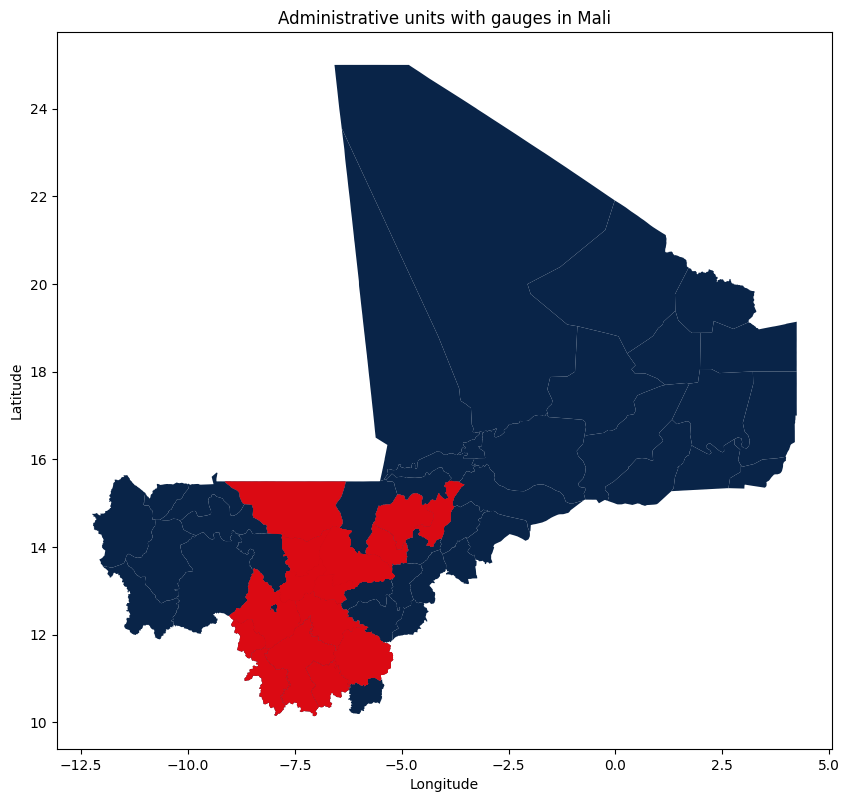

In [24]:
plot_admin_units_with_gauges(dict_datasets)

In [25]:
# With the datasets classified into admin units, we will now aggregate
# the data per admin unit and create a dataset with just the maximum value of
# the reforecast data at each possible timestep available in the datasets for
# each admin units (resulting in one dataset per admin unit)
def create_admin_unit_set(dict_ds: Dict[str, xr.Dataset]) -> set:
    """
    Create a unique set of the admin units in the datasets

    :param dict_ds: dict of datasets
    :return: set of admin units
    """
    admin_units = set()
    for ds in dict_ds.values():
        if 'admin_unit' in ds.attrs:
            if ds.attrs['admin_unit'] is None:
                print(f'No admin unit found in dataset {ds.attrs["gauge_id"]}')
            else:
                admin_units.update(ds.attrs['admin_unit'])
        else:
            raise ValueError('No admin unit found in dataset')
    return admin_units


def get_dict_ds_per_admin_unit(dict_ds: Dict[str, xr.Dataset]) -> Dict[str, list]:
    """
    Get a dictionary with the datasets per admin unit

    :param dict_ds: dict of datasets
    :return: dict of datasets per admin unit
    """
    admin_units = create_admin_unit_set(dict_ds)
    dict_ds_per_admin_unit = {unit: [] for unit in admin_units}
    for ds in dict_ds.values():
        for unit in ds.attrs['admin_unit']:
            dict_ds_per_admin_unit[unit].append(ds)
    return dict_ds_per_admin_unit


def pretty_print_list(l: list) -> None:
    """
    Pretty print a list

    :param l: list
    """
    print(', '.join(l))


def subset_lead_time(ds: xr.Dataset, lt: int) -> xr.Dataset:
    """
    Subset the dataset to a certain lead time

    :param ds: xarray Dataset
    :param lt: lead time to subset to
    :return: xarray Dataset with subsetted lead time
    """
    if lt < 0 or lt > 7:
        raise ValueError('Lead time must be between 0 and 7 days')
    return ds.sel(lead_time = pd.Timedelta(days = lt))


def assign_actual_dates_to_dataset(ds: xr.Dataset) -> xr.Dataset:
    """
    Assign the actual dates to the dataset as new coordinates

    :param ds: xarray Dataset
    :return: xarray Dataset with actual dates as coordinates
    """
    actual_dates = ds['issue_time'] + ds['lead_time']
    return ds.assign_coords(actual_date = ('issue_time', actual_dates.data))


def aggregate_per_admin_unit(
        dict_datasets: Dict[str, xr.Dataset],
        lead_time: int = 7,
        method: str = 'max',
        verbose: bool = True
    ) -> Dict[str, xr.Dataset]:
    """
    Aggregate the data per administrative unit with a method
    of choice, defaulting to 'max'; more options to be added later.
    With lead time, the forecast horizon can be subsetted

    :param dict_datasets: dict of datasets
    :param lead_time: lead time of the forecast to aggregate
    :param method: method of aggregation
    :param verbose: whether to print some test print-s's
    :return: dict of datasets with aggregated data
    """
    # get the datasets per admin unit for aggregation next;
    # check which admin units did not get any dataset assigned
    grouped_datasets = get_dict_ds_per_admin_unit(dict_datasets)
    if verbose:
        print("[admin unit ID] : list([gauge ID's])")
        for unit, datasets in grouped_datasets.items():
            print(unit, end = ' : ')
            pretty_print_list([ds.attrs['gauge_id'] for ds in datasets])
        print('\n')

    dict_datasets_aggregated = {}
    # time complexity is O(n), where n is the number of admin units
    idx = 1
    for admin_unit, datasets in grouped_datasets.items():
        if verbose:
            print(f'aggregating {idx}/{len(grouped_datasets)}: {admin_unit}')
            idx += 1
        
        # (2) concatenate the datasets into one dataset and add gauge_id dimension;
        # (3) filter by lead time, discarding the other lead times; (4) assign the
        # actual dates to the dataset, a.k.a. the date at which the forecast actually
        # applies to; (5) aggregate the data by 'actual date' and calculate with 'method'
        ds_combined = xr.concat(datasets, dim = 'gauge_id')
        ds_combined_subset = subset_lead_time(ds_combined, lead_time)
        ds_combined_actual_dates = assign_actual_dates_to_dataset(ds_combined_subset)
        
        if method == 'max':
            ds_aggregated = \
                ds_combined_actual_dates.groupby('actual_date').max(dim = 'gauge_id')
        elif method == 'mean':
            ds_aggregated = \
                ds_combined_actual_dates.groupby('actual_date').mean(dim = 'gauge_id')
        else:
            raise ValueError('Method parameter not recognised')

        # lastly, we update the attributes of the dataset of the admin unit,
        # since now we're up a level from gauges to units, asking for a replacement
        # of the attributes: we drop longitude, latitude, gauge_id, and admin_unit,
        # and add the admin_unit and the gauge_id's of the gauges in the unit
        ds_aggregated.attrs = {'admin_unit': admin_unit,
                               'gauge_ids': [ds.attrs['gauge_id'] for ds in datasets]}
        dict_datasets_aggregated[admin_unit] = ds_aggregated
    
    return dict_datasets_aggregated

In [26]:
# loop through all datasets and print out all administrative unit names
idx = 0
for hybas, ds in dict_datasets.items():
    print(idx, hybas, ds.attrs['admin_unit'])
    idx += 1

0 ds_reforecast_1120641660 ['ML0506']
1 ds_reforecast_1120650110 ['ML0201', 'ML0207']
2 ds_reforecast_1120661040 ['ML0201']
3 ds_reforecast_1120679780 ['ML0406']
4 ds_reforecast_1120689830 ['ML0206', 'ML0401']
5 ds_reforecast_1120705070 ['ML0206']
6 ds_reforecast_1120737100 ['ML0203', 'ML0204']
7 ds_reforecast_1120739110 ['ML0202', 'ML0305']
8 ds_reforecast_1120758950 ['ML0303', 'ML0301', 'ML0305']
9 ds_reforecast_1120766460 ['ML0306']
10 ds_reforecast_1121890140 ['ML0506']
11 ds_reforecast_1121893090 ['ML0507']
12 ds_reforecast_1121895840 ['ML0403']
13 ds_reforecast_1121900350 ['ML0406']
14 ds_reforecast_1121905290 ['ML0206', 'ML0401', 'ML0406']
15 ds_reforecast_1121919510 ['ML0204']


In [27]:
# aggregate the data per gauge to per admin unit
dict_datasets_au = aggregate_per_admin_unit(dict_datasets)

[admin unit ID] : list([gauge ID's])
ML0507 : 1121893090
ML0406 : 1120679780, 1121900350, 1121905290
ML0401 : 1120689830, 1121905290
ML0301 : 1120758950
ML0204 : 1120737100, 1121919510
ML0207 : 1120650110
ML0206 : 1120689830, 1120705070, 1121905290
ML0203 : 1120737100
ML0202 : 1120739110
ML0306 : 1120766460
ML0303 : 1120758950
ML0305 : 1120739110, 1120758950
ML0403 : 1121895840
ML0506 : 1120641660, 1121890140
ML0201 : 1120650110, 1120661040


aggregating 1/15: ML0507
aggregating 2/15: ML0406
aggregating 3/15: ML0401
aggregating 4/15: ML0301
aggregating 5/15: ML0204
aggregating 6/15: ML0207
aggregating 7/15: ML0206
aggregating 8/15: ML0203
aggregating 9/15: ML0202
aggregating 10/15: ML0306
aggregating 11/15: ML0303
aggregating 12/15: ML0305
aggregating 13/15: ML0403
aggregating 14/15: ML0506
aggregating 15/15: ML0201


In [28]:
for admin_unit, ds in dict_datasets_au.items():
    print(admin_unit, ds.attrs['gauge_ids'])

ML0507 ['1121893090']
ML0406 ['1120679780', '1121900350', '1121905290']
ML0401 ['1120689830', '1121905290']
ML0301 ['1120758950']
ML0204 ['1120737100', '1121919510']
ML0207 ['1120650110']
ML0206 ['1120689830', '1120705070', '1121905290']
ML0203 ['1120737100']
ML0202 ['1120739110']
ML0306 ['1120766460']
ML0303 ['1120758950']
ML0305 ['1120739110', '1120758950']
ML0403 ['1121895840']
ML0506 ['1120641660', '1121890140']
ML0201 ['1120650110', '1120661040']


In [31]:
from typing import List, Tuple
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import xarray as xr
# make a plot to visualise the aggregated data for a certain admin unit
# by plotting the individual gauges in the admin unit and the aggregated data
# which should nicely visualise the aggregation process, while also serving as a check
def plot_aggregated_reforecast(
        issue_time_start_date: str, issue_time_end_date: str,
        l_ds_gauges: List[xr.Dataset],
        ds_au: xr.Dataset,
        dict_return_periods: Dict[str, xr.Dataset],
        thresholds: Tuple[int] = (2, 5, 20)
    ) -> None:
    """ 
    Plots the gauges in an administrative unit and the aggregated data
    for that same administrative unit, showing if the aggregation process
    was processed correctly. (In contrast to plot_reforecast(), this function
    does not plot distinct lead times, since they're already filtered out
    in the aggregation process.)

    :param issue_time_start_date: start date for the issue time
    :param issue_time_end_date: end date for the issue time
    :param l_ds_gauges: list of xarray datasets for individual gauges
    :param ds_au: aggregated xarray dataset for the admin unit
    :param dict_return_periods: dictionary with return periods datasets
    :param thresholds: tuple with the thresholds for the return periods
    """
    fig, ax = plt.subplots(figsize = (20, 4))
    
    # plot individual gauges in the administrative unit
    for ds in l_ds_gauges:
        # for the gauge datasets, we still need to subset the lead time
        ds_7_day = ds.sel(lead_time = pd.Timedelta(days = 7))
        issue_time_slice = ds_7_day.sel(issue_time = \
                            slice(issue_time_start_date, issue_time_end_date))
        ax.plot(
            pd.to_datetime(issue_time_slice['issue_time'].values),
            issue_time_slice['streamflow'].values,
            alpha = 0.5,        # make the lines little bit transparent
            label = f'gauge {ds_7_day.attrs["gauge_id"]}'
        )
    
    # plot the aggregated timeseries (usually the maximum)
    ds_aggregated_slice = ds_au.sel(issue_time = \
                            slice(issue_time_start_date, issue_time_end_date))
    ax.plot(
        pd.to_datetime(ds_aggregated_slice['issue_time'].values),
        ds_aggregated_slice['streamflow'].values,
        color = '#092448',
        linewidth = 2,
        label = 'aggregated',
        zorder = 3              # make sure the aggregated data is on top
    )

    # add the return periods for all gauges in the admin unit,
    # only add the legend for the return periods once
    idx = 0
    for gauge_id in ds_au.attrs['gauge_ids']:
        ds_rp = dict_return_periods[f'hybas_{gauge_id}']
        if idx == 0:
            analyse.add_return_periods(ax, ds_rp, thresholds, True)
        else:
            analyse.add_return_periods(ax, ds_rp, thresholds, False)
        idx += 1

    for gauge_id in ds_au.attrs['gauge_ids']:
        ds_rp = dict_return_periods[f'hybas_{gauge_id}']
        analyse.add_return_periods(ax, ds_rp, thresholds, False)
        
    # set title, labels
    ax.set_title(f'aggregated forecast for {ds_au.attrs["admin_unit"]} with return periods per gauge')
    ax.set_xlabel('issue time')
    ax.set_ylabel('streamflow')
    plt.legend(loc = 'upper right')
    plt.show()


def get_datasets_unit_with_most_gauges(
        dict_ds_agg: Dict[str, xr.Dataset],
        dict_ds: Dict[str, xr.Dataset]
    ) -> Tuple[List[xr.Dataset], str]:
    """
    Finds the administrative unit with the most gauges and returns 
    the gauge datasets belonging to that unit in a list, taken from
    the non-aggregated dictionary of datasets

    :param dict_ds_agg: dict with the datasets
    :param dict_ds: dict with the datasets
    :return: list with the datasets of the admin unit with most gauges and unit name
    """
    most_common_admin_unit = \
        max(dict_ds_agg.keys(), key=lambda k: len(dict_ds_agg[k].attrs['gauge_ids']))
    
    datasets_for_admin_unit = [
        ds for ds in dict_ds.values() if most_common_admin_unit in ds.attrs['admin_unit']
    ]

    return datasets_for_admin_unit, most_common_admin_unit

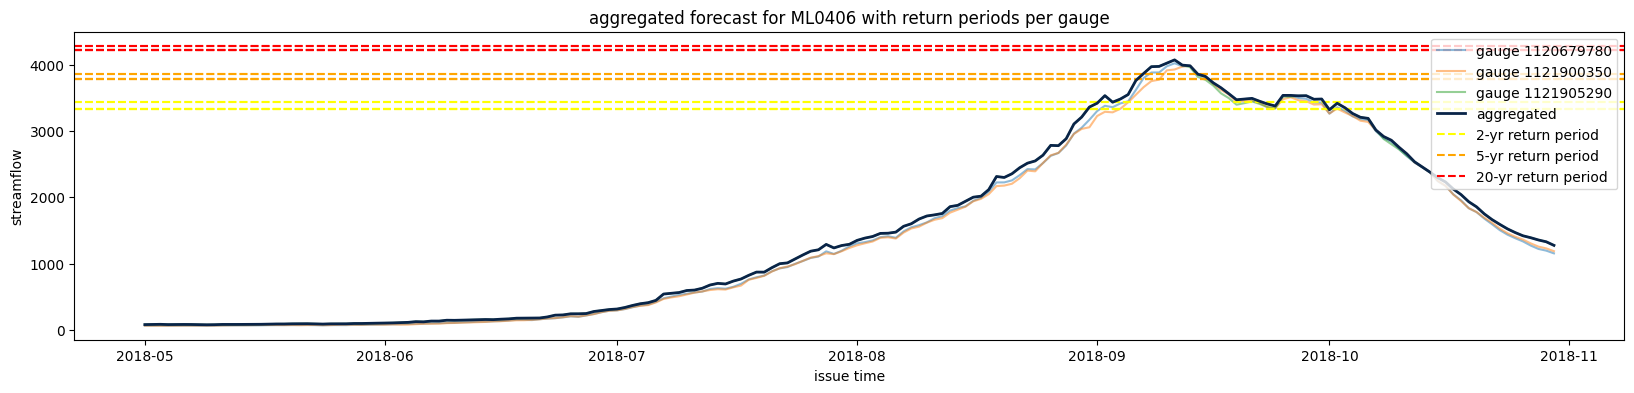

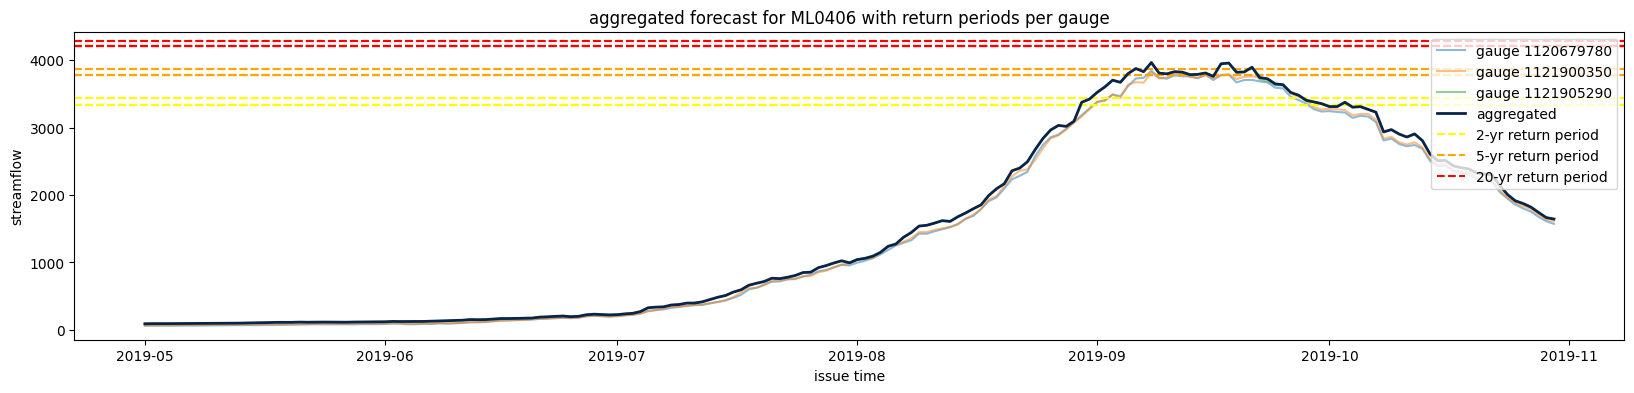

In [32]:
l_gauges_admin_unit_most, admin_unit_most_gauges = \
    get_datasets_unit_with_most_gauges(dict_datasets_au, dict_datasets)

plot_aggregated_reforecast('2018-05-01', '2018-10-30',
                           l_gauges_admin_unit_most,
                           dict_datasets_au[admin_unit_most_gauges],
                           dict_return_periods)

plot_aggregated_reforecast('2019-05-01', '2019-10-30',
                           l_gauges_admin_unit_most,
                           dict_datasets_au[admin_unit_most_gauges],
                           dict_return_periods)

In [33]:
# To determine when to trigger and identify an "event", we need to
# choose how we want to aggregate the return periods of each gauge
# into one value for the administrative unit. Multiple options can 
# be argued for, but we will start with the mean value of the return
# periods of the gauges in the administrative unit, with the reasoning
# that minima and maxima can be too extreme/skewed
import pandas as pd
import geopandas as gpd
import numpy as np
import xarray as xr
from typing import Dict, List

def aggregate_return_periods(
        dict_ds_au: Dict[str, xr.Dataset],
        dict_return_periods: Dict[str, xr.Dataset],
        rp_value: int = 5,
        method: str = 'mean'
    ) -> xr.Dataset:
    """
    Aggregate return periods per administrative unit based on the specified method
    
    :param dict_datasets_au: dict of datasets per admin unit
    :param dict_return_periods: dictionary of return period dataset per gauge
    :param rp_value: return period value to aggregate
    :param method: aggregation method ('min', 'mean', 'max')
    :return: dict with admin unit ID : dataset with rp dataaset
    """
    if rp_value not in [2, 5, 20]:
        raise ValueError("threshold must be 2, 5, or 20")
    return_periods_per_admin = {}
                                    # for each admin unit ds:
    for admin_unit, ds in dict_ds_au.items():
        return_period_values = []   # loop through its gauges and get the return periods
        for gauge_id in ds.attrs['gauge_ids']:
            return_period_ds = dict_return_periods.get(f'hybas_{gauge_id}')
                                    # store the return period value of choice
            if f'return_period_{rp_value}' in return_period_ds:
                return_period_values.append(return_period_ds[f'return_period_{5}'].item())
            else:
                print(f'No return period value {rp_value} found for gauge {gauge_id}')
                                    # store the return period values per admin unit
        return_periods_per_admin[admin_unit] = return_period_values

    # aggregate with method of choice
    aggregated_return_periods = {}
    for admin_unit, values in return_periods_per_admin.items():
        if method == 'min':
            aggregated_value = np.min(values)
        elif method == 'mean':
            aggregated_value = np.mean(values)
        elif method == 'max':
            aggregated_value = np.max(values)
        else:
            raise ValueError("Method not recognised")

        # create and save new dataset with the aggregated rp's
        aggregated_return_periods[admin_unit] = xr.Dataset({
                'return_period_5': aggregated_value
            }, attrs = {
                'admin_unit': admin_unit
            })

    return aggregated_return_periods

In [34]:
def export_dict_flood_events_to_csv(
        dict_flood_events: Dict[str, pd.DataFrame], verbose: bool = False
    ) -> None:
    """
    Export the dictionary with flood events to a csv file
    with a MultiIndex for keys and events

    :param dict_flood_events: dictionary with flood events
    """
    df_flood_events = pd.concat(dict_flood_events,
                                names = ['admin_unit', 'events'])
    print(df_flood_events) if verbose else None
                            # sort the index to make the csv file more readable
    df_flood_events = df_flood_events.sort_index()
                            # add n_flood_events to name to
                            # see difference between files
    n_flood_events = df_flood_events.shape[0]
    df_flood_events.to_csv(
        f'../data/processed/flood_events/flood_events_per_admin_{n_flood_events}.csv',
        sep = ';', decimal = '.')
    
    
def create_flood_mask(
        ds: xr.Dataset, rp_ds: xr.Dataset, au: str, threshold: int = 5
    ) -> np.ndarray:
    """
    Creates a boolean mask to identify when the streamflow
    exceeds the return period threshold

    :param ds: dataset with streamflow data
    :param rp_ds: dataset with aggregated return periods
    :param au: administrative unit
    :param threshold: return period threshold
    :return: boolean mask
    """
    if threshold not in [2, 5, 20]:
        raise ValueError("threshold must be 2, 5, or 20")
    if not au in rp_ds:
        raise ValueError(f"No return period dataset found for admin unit {au}")
    if rp_ds[au][f'return_period_{threshold}'].item() is None:
        raise ValueError(f"No return period value found for admin unit {au}")
    # return a boolean mask where True indicates that the streamflow
    # exceeds the return period threshold for the administrative unit
    return ds['streamflow'] > rp_ds[au][f'return_period_{threshold}'].item()


def create_flood_events(
        dict_ds_au: Dict[str, xr.Dataset],
        ds_rp_agg: xr.Dataset,
        threshold: int = 5
    ) -> Dict[str, pd.DataFrame]:
    """
    Creates flood events based on the return period threshold.
    A flood event is defined as a consecutive period where the
    streamflow exceeds the given threshold for the return period

    :param dict_ds_au: dict of ds per admin unit
    :param ds_rp_agg: ds rp per gauge
    :param threshold: rp-value to trigger flood event (default is 5)
    :return: dict with df of flood events per admin unit
    """
    if threshold not in [2, 5, 20]:
        raise ValueError("threshold must be 2, 5, or 20")
    # ds_rp_agg = aggregate_return_periods(dict_ds_au, ds_rp_agg, threshold)
    
    flood_events_per_au = {}    # for each admin unit ds:
    for admin_unit, ds in dict_ds_au.items():
                                # create a boolean mask to identify when
                                # the streamflow exceeds the return period threshold
        flood_mask = create_flood_mask(ds, ds_rp_agg, admin_unit, threshold)
        
        flood_events = []
                                # find the start and end of flood events by checking
                                # consecutive True values in the mask
        flood_start, flood_end = None, None
        for idx, is_flood in enumerate(flood_mask):
            if is_flood and flood_start is None:
                                # start of a new flood event
                flood_start = ds['actual_date'].values[idx]
            elif not is_flood and flood_start is not None:
                                # end of the current flood event
                flood_end = ds['actual_date'].values[idx - 1]
                
                                # store the flood event details
                flood_events.append({
                    'flood_start': flood_start,
                    'flood_end': flood_end,
                                # inclusive difference (+1) between the two dates
                    'duration': pd.Timedelta(flood_end - flood_start).days + 1,
                    'peak_streamflow': \
                        ds['streamflow'].sel(issue_time = slice(flood_start,
                                                                flood_end)).max().item()
                })
                                # reset flood_start and flood_end
                flood_start, flood_end = None, None
                                # by now, if flood_start is not None,
                                # it means the flood event is still going
        if flood_start is not None:
            flood_end = ds['actual_date'].values[-1]
            flood_events.append({
                'flood_start': flood_start,
                'flood_end': flood_end,
                'duration': pd.Timedelta(flood_end - flood_start).days + 1,
                'peak_streamflow': \
                    ds['streamflow'].sel(issue_time = \
                                         slice(flood_start, flood_end)).max().item()
            })
                                # store the flood events per admin unit in a df
        flood_events_per_au[admin_unit] = pd.DataFrame(flood_events)

    return flood_events_per_au

In [ ]:
dict_rp_au = aggregate_return_periods(dict_datasets_au, dict_return_periods)
# Note that the flood events are already calculated by their "actual date"
dict_flood_events_per_admin = create_flood_events(dict_datasets_au, dict_rp_au)
export_dict_flood_events_to_csv(dict_flood_events_per_admin, True)

                  flood_start  flood_end  duration  peak_streamflow
admin_unit events                                                  
ML0507     0       2018-09-14 2018-09-26        13      3020.103516
           1       2019-09-18 2019-09-20         3      2936.303955
           2       2019-09-22 2019-10-01        10      2930.903320
           3       2020-09-13 2020-10-04        22      3385.131348
           4       2020-10-09 2020-10-09         1      2660.685059
...                       ...        ...       ...              ...
ML0201     0       2018-09-12 2018-09-12         1        41.234055
           1       2019-08-27 2019-08-27         1       111.021347
           2       2019-08-29 2019-09-02         5        65.588799
           3       2020-08-27 2020-08-27         1       144.448074
           4       2020-08-29 2020-09-11        14       299.272522

[120 rows x 4 columns]


In [36]:
print(dict_rp_au['ML0201'])

<xarray.Dataset>
Dimensions:          ()
Data variables:
    return_period_5  float64 114.8
Attributes:
    admin_unit:  ML0201


In [37]:
def plot_agg_reforecast(start_date: str, end_date: str,
                        ds_rf: xr.Dataset, ds_rp: xr.Dataset,
                        threshold: int = 5,
    ) -> None:
    """
    Plots aggregated reforecast data for a given time range

    :param start_date: start date for the time range
    :param end_date: end date for the time range
    :param ds_rf: reforecast dataset of admin unit
    :param ds_rp: return periods dataset
    :param thresholds: list of thresholds to add return periods for
    """
    fig, ax = plt.subplots(figsize = (20, 4))
    ds_subset = ds_rf.streamflow.sel(issue_time = slice(start_date, end_date))
    
    ax.plot(ds_subset.issue_time, ds_subset.values)
    analyse.add_return_periods(ax, ds_rp, [threshold])
    ax.set_title(f'Reforecast data for {ds_rf.attrs["admin_unit"]} with {threshold}-yr return period')
    plt.legend(loc = 'upper right')
    plt.show()

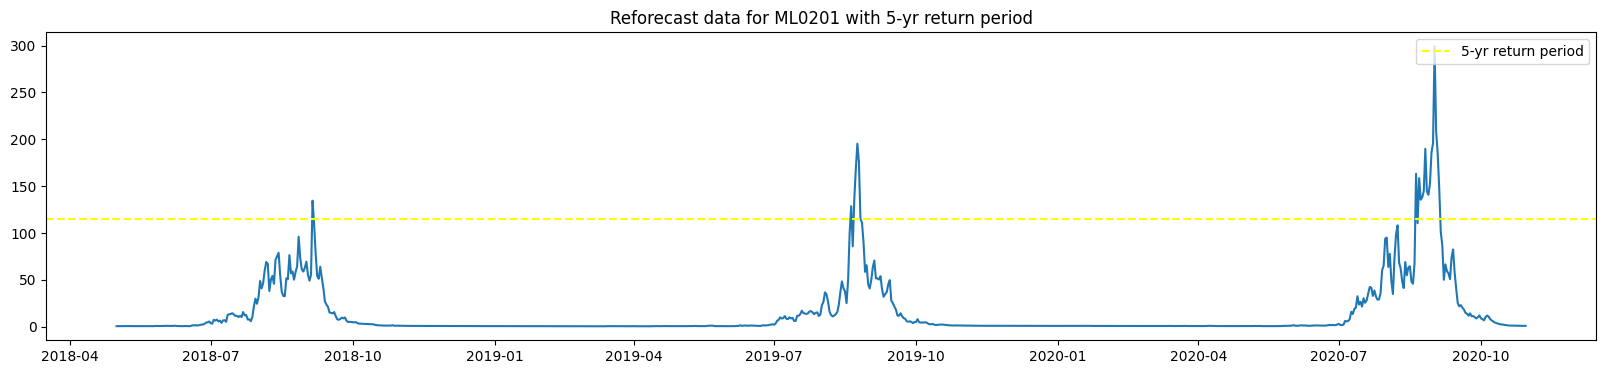

In [38]:
# Check whether the flood events are correctly created using some plots:
"""
ML0201;0;2018-09-05;2018-09-05;0;134.45091247558594
ML0201;1;2019-08-20;2019-08-20;0;128.57044982910156
ML0201;2;2019-08-22;2019-08-26;4;195.2600860595703
ML0201;3;2020-08-20;2020-08-20;0;163.1853790283203
ML0201;4;2020-08-22;2020-09-04;13;299.27252197265625
"""
# ML0201, for example, has 5 flood events, with some having a duration of 0 days.
# Let's investigate with a plot and see if this has been processed correctly
issue_time_start_date = '2018-05-01'
issue_time_end_date = '2020-10-30'

plot_agg_reforecast(issue_time_start_date, issue_time_end_date,
                    dict_datasets_au['ML0201'], dict_rp_au['ML0201'])

In [39]:
# # Manual .xlsx to .csv conversion errors, so we'll recreate the .csv manually
# """
# df_impact_data = pd.read_csv('../data/impact_data/impact_data_Mali.csv',
#                              sep = ',',
#                              header = 0,
#                              encoding = 'utf-8')
# print(df_impact_data.head())
# """
# import openpyxl
# import csv

# sheet = openpyxl.load_workbook('../data/impact_data/impact_data_Mali.xlsx').active

# with open('../data/impact_data/impact_data_Mali_recreated.csv',
#           'w',
#           newline = '',
#           encoding = 'utf-8') as csvfile:
#     csvwriter = csv.writer(csvfile, delimiter = ';')
#     for row in sheet.iter_rows():
#         csvwriter.writerow([cell.value if cell.value is not None else "" for cell in row])

# df_impact_data = pd.read_csv('../data/impact_data/impact_data_Mali_recreated.csv',
#                                 sep = ',',
#                                 header = 0,
#                                 encoding = 'utf-8')
# print(df_impact_data.columns)
# print(df_impact_data.head())

In [40]:
# the next step is to load in the impact data and to transform it to
# a format that is similar to the flood events, such that we can compare
# and evaluate the model's performance
df_impact_data = pd.read_csv('../data/impact_data/impact_data_Mali.csv',
                                sep = ',',
                                header = 0,
                                encoding = 'utf-8')
print(df_impact_data.columns)
print(df_impact_data.head())

Index(['ID', 'Années', 'Mois', 'Jours', 'Start Date', 'End Date',
       'Duration (Days)', 'Pays', 'Région', 'Cercle', 'Commune',
       'Quartier/Villages', '#Ménages touchés', '#Personnes affectées',
       '#Ménages sinistrées', '#Personnes sinistrées', '#Personnes blessées',
       'Personnes déplacées', '#Personnes décedées', 'Sum personnes affectées',
       '#Maisons endommagées', '#Maisons detruites', '#Ecole endommagées',
       '#Ecole occupées', '#Points d'eau endommagés', '#Latrines détruites',
       '# Magasins effondres', 'Vivres (T)', 'Superficie Cultures (ha)',
       'Betails', 'Volailles', 'Sum maisons et services affectées',
       'Hauteur pluie (mm)', 'Autres dégâts', 'Alimentaires', 'Abris',
       'Kits WASH', 'NFI', 'Autres réponses', 'Sum réponse',
       'Organisations ayant apporté d'assistance', 'Besoins Non couverts',
       'Column1', 'Source', 'Document initial', 'Tab document initial',
       'Event Duration', 'Unnamed: 0', 'region (adm1)', 'cercle (ad

In [41]:
def fill_cercle_from_commune(d: Dict[str, List[str]], row: pd.Series) -> str:
    """ 
    Tries to fill in an empty 'Cercle' column with the corresponding
    'Cercle' value from the 'Commune' entry in the dict if there is one

    :param dict: dictionary with commune-cercle mapping
    :param row: row from df
    :return: 'Cercle' value (hopefully)
    """
    if pd.isna(row['Cercle']) or row['Cercle'].strip() == '':
        commune = row['Commune']
        if commune in d and len(d[commune]) == 1:
            return d[commune][0]
        else:
            return row['Cercle']
    else:
        return row['Cercle']


def export_dict_impact_events_to_csv(
        dict_impact_events: Dict[str, pd.DataFrame], verbose: bool = False
    ) -> None:
    """
    Export the dictionary with impact events to a csv file
    with a MultiIndex for keys and events

    :param dict_flood_events: dictionary with flood events
    """
    df_flood_events = pd.concat(dict_impact_events,
                                names = ['admin_unit', 'events'])
    print(df_flood_events) if verbose else None
    # add n_flood_events to name to see difference between files
    n_flood_events = df_flood_events.shape[0]
    df_flood_events.to_csv(
        f'../data/processed/flood_events/impact_events_per_admin_{n_flood_events}.csv',
        sep = ';', decimal = '.')
    

def map_cercle_names_to_pcodes(
        df: pd.DataFrame,
        path: str = 'mali_ALL/mli_adm_ab_shp/mli_admbnda_adm2_1m_gov_20211220.shp',
        verbose: bool = False
        ) -> Dict[str, str]:
    """
    Maps the Cercle names in the impact data to the pcodes found in the
    shape file of the administrative units and used for the flood events

    :param df: dataframe with impact data
    :param path: path to the shape file
    :param verbose: whether to print some test prints
    :return: dictionary with Cercle names mapped to pcodes
    """
                        # load shape file and normalise columns of interest
    gdf = analyse.get_shape_file(path).to_crs('EPSG:4326')
    gdf['ADM2_FR'] = gdf['ADM2_FR'].str.strip().str.upper()\
                        .str.normalize('NFKD').str.encode('ascii',errors = 'ignore')\
                            .str.decode('utf-8') 
                        # use the print statements to compare admin unit names
                        # of the shape file and of the impact data
    # print(np.sort(gdf['ADM2_FR'].unique()))
                        # print out the identifiers in the impact data which are not
                        # found in the shape file, so we can manually check and correct
    if verbose:
        print('Identifiers in impact data not found in shape file:')
        print(np.sort(np.setdiff1d(df['Cercle'].unique(), gdf['ADM2_FR'].unique())))
                        # the print statement above and this one produce:
    """
    ['ABEIBARA' 'ANDERAMBOUKANE' 'ANSONGO' 'BAFOULABE' 'BAMAKO' 'BANAMBA'
    'BANDIAGARA' 'BANKASS' 'BARAOUELI' 'BLA' 'BOUGOUNI' 'BOUREM' 'DIEMA'
    'DIOILA' 'DIRE' 'DJENNE' 'DOUENTZA' 'GAO' 'GOUNDAM' 'GOURMA-RHAROUS'
    'INEKAR' 'KADIOLO' 'KANGABA' 'KATI' 'KAYES' 'KENIEBA' 'KIDAL' 'KITA'
    'KOLOKANI' 'KOLONDIEBA' 'KORO' 'KOULIKORO' 'KOUTIALA' 'MACINA' 'MENAKA'
    'MOPTI' 'NARA' 'NIAFUNKE' 'NIONO' 'NIORO' 'SAN' 'SEGOU' 'SIKASSO'
    'TENENKOU' 'TESSALIT' 'TIDERMENE' 'TIN-ESSAKO' 'TOMBOUCTOU' 'TOMINIAN'
    'YANFOLILA' 'YELIMANE' 'YOROSSO' 'YOUWAROU']
    <class 'numpy.ndarray'>
    ['GOUMERA' 'ESSOUK' 'INTACHDAYTE' 'AGUELHOK' 'TAMKOUTAT' 'ZEGOUA' 'SONA'
    'KOURY' 'BIRAMABOUGOU' 'SANDIA' 'TOUBAKORO' 'KENEKOUN']
    """
                        # create a mapping from Cercle names to pcodes
    mapping = gdf.set_index('ADM2_FR')['ADM2_PCODE'].to_dict()
                        # some manual corrections made by searching Google Maps and GeoView
    manual_corrections = {
        'GOUMERA' : mapping.get('KAYES'),
        'ESSOUK' : mapping.get('KIDAL'),
        'INTACHDAYTE' : mapping.get('KIDAL'),
        'AGUELHOK' : mapping.get('TESSALIT'),
        'TAMKOUTAT' : mapping.get('GAO'),
        'ZEGOUA' : mapping.get('KADIOLO'),
        'SONA' : mapping.get('YOROSSO'),
        'KOURY' : mapping.get('YOROSSO'),
        'BIRAMABOUGOU' : mapping.get('SIKASSO'),
        'SANDIA' : mapping.get('KAYES'),
        'TOUBAKORO' : mapping.get('KOULIKORO'),
        'KENEKOUN' : mapping.get('KANGABA')
    }
                        # update the mapping with the manual corrections
                        # and apply the mapping to the 'Cercle' column    
    mapping.update(manual_corrections)
    df['admin_unit'] = df['Cercle'].apply(lambda x: mapping.get(x, None))
    print(df.head()) if verbose else None
                        # handle unmapped Cercle values
    unmapped_cercles = df[df['admin_unit'].isnull()]['Cercle'].unique()
    if unmapped_cercles.size > 0:
        raise ValueError(f'Unmapped Cercle values: {unmapped_cercles}')
    
    return df


def process_impact_data_to_events(
        df: pd.DataFrame, verbose: bool = False
    ) -> Dict[str, pd.DataFrame]:
    """
    Process the "raw" impact data to events similar
    to the events created from the flood data, with
    specifically, per administative unit:
    - start date of the event;
    - end date of the event;
    - duration of the event; and
    
    Here, especially classification into administrative units
    is problematic, as some data is missing. How this is handled
    can vary per your specific use case, and for missing rows
    information is printed when verbose is True

    :param df: dataframe with impact data
    :param verbose: whether to be verbose
    :return: dictionary with events per administrative unit
    """                  
                        # keep only (possitbly) relevant columns, of which notable:
                        # - 'Start date' and 'End date': self-explanatory
                        # - 'Cercle': administrative unit
                        # - the rest gives more location information, which might be
                        #   useful if administrative unit information is missing
    df = df[['Start Date', 'End Date', 'Région', 'Cercle', 'Commune', 'Quartier/Villages']].copy()
                        # rename 'Start date' and 'End date' to 'flood_start' and 'flood_end'
                        # and convert them to datetime objects with flag 'raise' for errors:
                        # if any dates are missing they can be reconstructed using the
                        # 'Années', 'Mois', and 'Jours' columns, but was not needed here
    df.rename(columns = {'Start Date': 'flood_start', 'End Date': 'flood_end'}, inplace = True)
    df['flood_start'] = pd.to_datetime(df['flood_start'], format = '%d/%m/%Y', errors = 'raise')
    df['flood_end'] = pd.to_datetime(df['flood_end'], format = '%d/%m/%Y', errors = 'raise')
                        # after printing out rows with missing dates with the following line:
    """
    print(df[df['flood_start'].isnull() | df['flood_end'].isnull()]) if verbose else None
    """ 
                        # row 133 was empty, so we drop it
    df.dropna(subset = ['flood_start', 'flood_end'], inplace = True)
                        # double check if no dates are missing
    if df['flood_start'].isnull().values.any() or df['flood_end'].isnull().values.any():
        raise ValueError('Missing dates in impact data')
                        # next, we normalise 'Cercle' column to no whitespace and uppercase,
                        # and also delete any accents on top of letters or dashes etc to make
                        # sure the 'Cercle' column is as clean and uniform as possible
    df['Cercle'] = df['Cercle'].str.strip().str.upper()
    df['Cercle'] = df['Cercle'].str.normalize('NFKD').str.encode('ascii', errors = 'ignore').str.decode('utf-8')
                        # solve some other specific naming ambiguities:
    df['Cercle'] = df['Cercle'].str.replace(r'\bTOMBOUCTO\b', 'TOMBOUCTOU', regex = True)
    df['Cercle'] = df['Cercle'].str.replace(r'\bGOURMA-RH\b', 'GOURMA-RHAROUS', regex = True)
    df['Cercle'] = df['Cercle'].str.replace('NIAFUNKE + MORE LOCATIONS', 'NIAFUNKE')
    df['Cercle'] = df['Cercle'].str.replace(r'\bBANDIAGAR\b', 'BANDIAGARA', regex = True)
    df['Cercle'] = df['Cercle'].str.replace('BAROUELI', 'BARAOUELI')
    df['Cercle'] = df['Cercle'].str.replace('DIOLA', 'DIOILA')
    df['Cercle'] = df['Cercle'].str.replace('NIANFUNKE', 'NIAFUNKE')
    df['Cercle'] = df['Cercle'].str.replace('ASANGO', 'ANSONGO')
    df['Cercle'] = df['Cercle'].str.replace('KOLONDIEB', 'KOLONDIEBA')

                        # to handle missing 'Cercle' information, we make a mapping/dict
                        # with as key the Commune (which is a subset of Cercle) and as
                        # value the corresponding Cercle, which can be used after to fill
                        # in missing Cercle information. We also check if there are not
                        # illogical double entries, which would need manual handling. We
                        # also change Cercle names with 'District' to NaN, so they can maybe
                        # be picked up by the Commune-Cercle mapping
    df['Cercle'] = df['Cercle'].replace('DISTRICT', np.nan)
    df['Commune'] = df['Commune'].str.strip().str.upper()
    dict_communce_cercle = df.groupby('Commune')['Cercle'].unique().to_dict()
                        # delete NaN's from the arrays itself in the dictionary;
                        # loop over all dictionary items and remove NaN's
    for commune, cercles in dict_communce_cercle.items():
        dict_communce_cercle[commune] = [cercle for cercle in cercles if isinstance(cercle, str)]
                        # check whether a commune is associated w/ a missing or multiple cercles
    for commune, cercles in dict_communce_cercle.items():
        if len(cercles) == 1 and (not isinstance(cercles[0], str) or cercles[0].strip() == ''):
            if verbose:
                print(f"Commune '{commune}' is associated with a missing Cercle")
    for commune, cercles in dict_communce_cercle.items():
        if len(cercles) > 1:
            if verbose:
                print(f"Commune '{commune}' is associated with multiple Cercles: {cercles}")
                        # which prints:
    """
    Commune 'BLA' is associated with multiple Cercles: ['SAN', 'BLA']
    Commune 'LOGO' is associated with multiple Cercles: ['YELIMANE', 'KAYES']
    Commune 'TIENFALA' is associated with multiple Cercles: ['BOUGOUNI', 'KOULIKORO']
    """
                        # so we handle these manually (after checking Google Maps etc.)
    dict_communce_cercle['BLA'] = ['SEGOU']
    dict_communce_cercle['LOGO'] = ['KAYES']
    dict_communce_cercle['TIENFALA'] = ['KOULIKORO']

                        # next, we fill in missing 'Cercle' information with the dictionary
                        # we created above, and we print out the rows with missing 'Cercle'
    df['Cercle'] = df.apply(lambda row: fill_cercle_from_commune(dict_communce_cercle, row),
                            axis = 1)
    df_missing_cercle = df[df['Cercle'].isnull() | \
        df['Cercle'].apply(lambda x: not isinstance(x, str) or x.strip() == '')]
    if verbose:         # Note: the above modifications "saved" 13 flood events
        print(f'\nImpact events without Cercle info: {df_missing_cercle.shape[0]}')
        print(f'Impact events with Cercle info: {df.shape[0] - df_missing_cercle.shape[0]}\n')
                        # Note: if after above, 'Cercle' is still missing, we *could* try
                        # and see if the 'Region' column is (coincidently?) the same as a
                        # 'Cercle' column, but we ignore this possibility for now.
                        # Next, we separate the data which has no 'Cercle' information
                        # and drop the three unnecessary remaining columns 
    df = df[~df.index.isin(df_missing_cercle.index)]
    df = df.drop(columns = ['Région', 'Commune', 'Quartier/Villages'])
                        # calculate the duration of each flood event and add as column,
                        # where the difference is inclusive, so we add 1 to the result
    df['duration'] = (df['flood_end'] - df['flood_start']).dt.days + 1

                        # next, we map the names of the 'Cercle' column to the admin units
                        # in the flood data, and we check if all 'Cercle' values are mapped
    df = map_cercle_names_to_pcodes(df) 
    df_missing_mapping = df[df['admin_unit'].isnull()]
    if df_missing_mapping.shape[0] > 0:
        print(f'unmapped Cercle values: {df_missing_mapping["Cercle"].unique()}')
    df.to_csv('../data/impact_data/impact_data_Mali_tidied.csv')
                        # lastly, we group the data by 'Cercle' and create a dictionary
                        # with the 'Cercle' as key and the corresponding dataframe as value
    dict_events = {}

    for cercle, df_group in df.groupby('admin_unit'):
                        # ensure chronological order of the events
        df_group = df_group.sort_values(by = ['flood_start', 'flood_end']).reset_index(drop = True)
                        # give events an identifier and set as index
        df_group['event'] = df_group.index
        df_group.set_index('event', inplace = True)
        df_events = df_group[['flood_start', 'flood_end', 'duration']]
        dict_events[cercle] = df_events

                        # export to csv and return
    export_dict_impact_events_to_csv(dict_events, verbose)
    
    return dict_events

In [42]:
dict_impact_events = process_impact_data_to_events(df_impact_data, False)

In [43]:
# Next and final step of impact data preprocessing is subsetting by the available dates
# in the forecast data and by the available administrative units in the forecast data
def determine_min_max_date_of_dataset(d_ds: Dict[str, xr.Dataset]) -> Tuple[str, str]:
    """
    Determine the earliest and latest date of the datasets

    :param d_ds: dictionary with datasets
    :return: tuple with earliest and latest date
    """
    earliest_dates = []
    latest_dates = []
    for ds in d_ds.values():
        earliest_dates.append(ds['issue_time'].values[0])
        latest_dates.append(ds['issue_time'].values[-1])

    return min(earliest_dates), max(latest_dates)


def subset_events_on_unit_and_date(
        d_events: Dict[str, pd.DataFrame], d_units, earliest_date: str, latest_date: str
    ) -> Dict[str, pd.DataFrame]:
    """
    Subset the events on the available administrative units and dates,
    while also returning a list of admin units with no impact data

    :param d_events: dictionary with events
    :param d_units: dictionary with available administrative units
    :param earliest_date: earliest date
    :param latest_date: latest date
    :return: dictionary with subsetted events
    """
    d_subsetted = {}
    no_impact_data = []
    for admin_unit, df in d_events.items():
        if admin_unit in d_units:
            df['flood_start'] = pd.to_datetime(df['flood_start'])
            df['flood_end'] = pd.to_datetime(df['flood_end'])

            df_subset = df[(df['flood_start'] >= earliest_date) & \
                            (df['flood_end'] <= latest_date)]
            if not df_subset.empty:
                d_subsetted[admin_unit] = df_subset
            else:
                print(f'\tno impact data found for {admin_unit}')
                no_impact_data.append(admin_unit)
        else:
            print(f'{admin_unit} impact data discarded due to lack of forecast data')
    
    return d_subsetted, no_impact_data

In [44]:
                            # determine available units and earliest and latest dates
available_admin_units = set(dict_datasets_au.keys())
earliest_date, latest_date = determine_min_max_date_of_dataset(dict_datasets_au)
                            # subset the impact events on the available units and dates
dict_impact_events_subset, no_impact_data = subset_events_on_unit_and_date(
    dict_impact_events, available_admin_units, earliest_date, latest_date)

ML0101 impact data discarded due to lack of forecast data
ML0102 impact data discarded due to lack of forecast data
ML0103 impact data discarded due to lack of forecast data
ML0104 impact data discarded due to lack of forecast data
ML0105 impact data discarded due to lack of forecast data
ML0106 impact data discarded due to lack of forecast data
ML0107 impact data discarded due to lack of forecast data
	no impact data found for ML0201
ML0205 impact data discarded due to lack of forecast data
ML0302 impact data discarded due to lack of forecast data
	no impact data found for ML0303
ML0304 impact data discarded due to lack of forecast data
	no impact data found for ML0306
ML0307 impact data discarded due to lack of forecast data
ML0402 impact data discarded due to lack of forecast data
	no impact data found for ML0403
ML0404 impact data discarded due to lack of forecast data
ML0405 impact data discarded due to lack of forecast data
ML0407 impact data discarded due to lack of forecast dat

In [45]:
print(dict_impact_events_subset)

{'ML0202':       flood_start  flood_end  duration
event                                 
10     2017-05-14 2017-05-14         1
11     2017-05-14 2017-05-15         2
12     2017-08-14 2017-08-15         2
13     2022-06-17 2022-06-18         2
14     2022-06-29 2022-06-30         2
15     2022-07-17 2022-07-18         2
16     2022-09-01 2022-09-02         2
17     2022-09-01 2022-09-02         2, 'ML0203':       flood_start  flood_end  duration
event                                 
10     2019-08-07 2019-08-07         1, 'ML0204':       flood_start  flood_end  duration
event                                 
16     2022-06-17 2022-06-18         2
17     2022-08-12 2022-08-13         2
18     2022-08-12 2022-08-13         2
19     2022-08-12 2022-08-13         2, 'ML0206':       flood_start  flood_end  duration
event                                 
14     2016-07-27 2016-07-27         1
15     2016-08-01 2016-08-01         1
16     2016-08-02 2016-08-02         1
17     2016-08-04 20

In [46]:
# get the admin units with no impact data out of the flood events,
dict_flood_events_final = {k: v for k, v in dict_flood_events_per_admin.items() \
                           if k not in no_impact_data}
export_dict_flood_events_to_csv(dict_flood_events_final)
print(dict_flood_events_final)

{'ML0406':   flood_start  flood_end  duration  peak_streamflow
0  2018-09-14 2018-09-22         9      3854.892822
1  2019-09-13 2019-09-16         4      3809.708252
2  2019-09-18 2019-09-19         2      3956.791504
3  2019-09-22 2019-09-22         1      3741.114014
4  2019-09-24 2019-09-28         5      3647.611328
5  2020-09-13 2020-09-30        18      4191.568359
6  2021-09-23 2021-09-23         1      3665.616455
7  2022-09-28 2022-10-08        11      3937.196533, 'ML0401':   flood_start  flood_end  duration  peak_streamflow
0  2018-09-11 2018-09-21        11      4324.897461
1  2019-09-13 2019-09-20         8      4090.614014
2  2019-09-22 2019-09-22         1      3897.924316
3  2019-09-24 2019-09-25         2      3799.457520
4  2019-09-28 2019-09-28         1      3574.295654
5  2020-09-13 2020-09-30        18      4363.530762
6  2021-09-23 2021-09-23         1      3762.852539
7  2022-09-25 2022-09-25         1      4083.809814
8  2022-09-27 2022-09-28         2      40

In [47]:
# filter out double impact events by checking whether events have the 
# same start date, and then merge them to an event with the start date
# of the first, and end date of the last event with the same start date
def merge_duplicate_events(d_events: Dict[str, pd.DataFrame]) -> Dict[str, pd.DataFrame]:
    """
    Merges duplicate impact events that have the same
    flood start date for each administrative unit

    :param dict_events: dict with au codas keys and events dfs as values
    :return: same dict, but merged
    """
    d_events_merged = {}

    for admin_unit, df_events in d_events.items():
        df_events = df_events.reset_index(drop = True)
        grouped = df_events.groupby('flood_start', as_index = False)
                            # merge events with the same start date
        merged_events = grouped.agg({
            'flood_start': 'first',
            'flood_end': 'max'
        })
                            # recalculate duration and reset identifiers/columns
        merged_events['duration'] = (merged_events['flood_end'] - merged_events['flood_start']).dt.days + 1
        merged_events = merged_events.sort_values('flood_start').reset_index(drop = True)
        merged_events['event'] = merged_events.index
        merged_events.set_index('event', inplace = True)
        merged_events = merged_events[['flood_start', 'flood_end', 'duration']]
                            # add to result
        d_events_merged[admin_unit] = merged_events

    return d_events_merged

In [48]:
dict_impact_events_final = merge_duplicate_events(dict_impact_events_subset)
export_dict_impact_events_to_csv(dict_impact_events_final)
print(dict_impact_events_final)

{'ML0202':       flood_start  flood_end  duration
event                                 
0      2017-05-14 2017-05-15         2
1      2017-08-14 2017-08-15         2
2      2022-06-17 2022-06-18         2
3      2022-06-29 2022-06-30         2
4      2022-07-17 2022-07-18         2
5      2022-09-01 2022-09-02         2, 'ML0203':       flood_start  flood_end  duration
event                                 
0      2019-08-07 2019-08-07         1, 'ML0204':       flood_start  flood_end  duration
event                                 
0      2022-06-17 2022-06-18         2
1      2022-08-12 2022-08-13         2, 'ML0206':       flood_start  flood_end  duration
event                                 
0      2016-07-27 2016-07-27         1
1      2016-08-01 2016-08-01         1
2      2016-08-02 2016-08-02         1
3      2016-08-04 2016-08-04         1
4      2019-08-07 2019-08-07         1, 'ML0207':       flood_start  flood_end  duration
event                                 
0      20

In [ ]:
# we can now calculate the performance of the model by comparing the
# flood events to the impact events, and we will do this by calculating
# the following metrics:
# - True Positives (TP): the number of correctly predicted flood events;
# - False Positives (FP): the number of incorrectly predicted flood events; and
# - False Negatives (FN): the number of missed flood events,
# and with these a bunch of other metrics such as:
# - Precision: TP / (TP + FP)
# - Recall: TP / (TP + FN)
# - F1-score: 2 * Precision * Recall / (Precision + Recall)
# - POD (Probability of Detection): TP / (TP + FN)
# - FAR (False Alarm Rate): FP / (TP + FP)
# - CSI (Critical Success Index): TP / (TP + FP + FN)